In [2]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#read data
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [16]:
# info() gives you structural information about the dataset

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [ ]:
# check the first five rows of data
df.head()

In [ ]:
# check if ther is any missing data
print(df.isnull().sum())

Text(0.5, 1.0, 'Monthly_Hours_Watched Distribution')

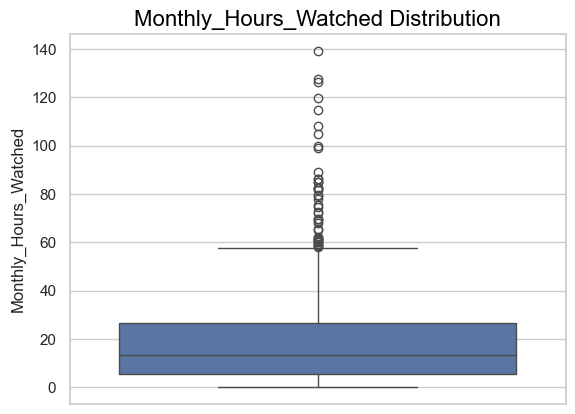

In [34]:
#check the botplot for outliers of Monthly_Hours_Watched
sns.boxplot(df['Monthly_Hours_Watched'])
plt.title('Monthly_Hours_Watched Distribution', fontsize=16, color='Black')

Text(0.5, 1.0, 'Average_Session_Length')

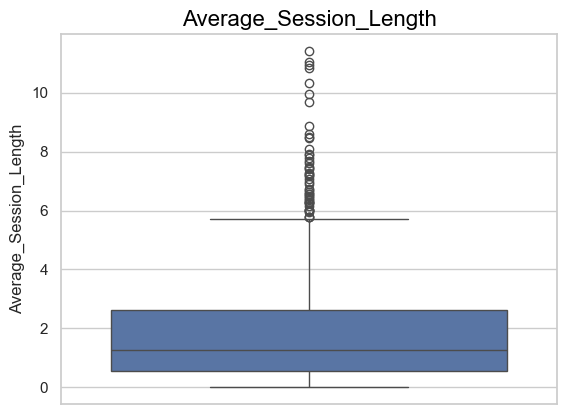

In [33]:
#check the botplot for outliers of Average_Session_Length
sns.boxplot(df['Average_Session_Length'])
plt.title('Average_Session_Length', fontsize=16, color='Black')
# based on the two plots, there are several outliers in the two sections, 
# but I think the number of the data is still reasonable, then I will not do any replace or remove for the data.

In [21]:
# count the number of the churned user and not churned user
churn_counts = df['Churned'].value_counts()
print(churn_counts)


Churned
0    754
1    246
Name: count, dtype: int64


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/3737155126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


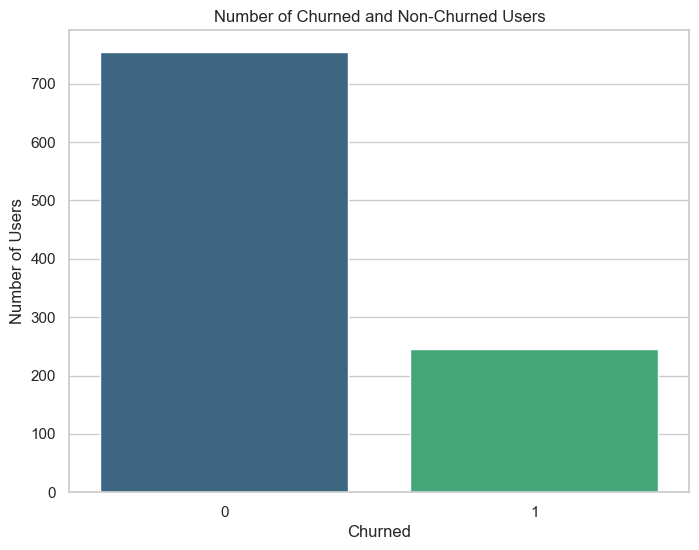

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid")

# 创建条形图
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
plt.title('Number of Churned and Non-Churned Users')
plt.xlabel('Churned')
plt.ylabel('Number of Users')
plt.show()

Text(0, 0.5, 'Percentage Of Churned')

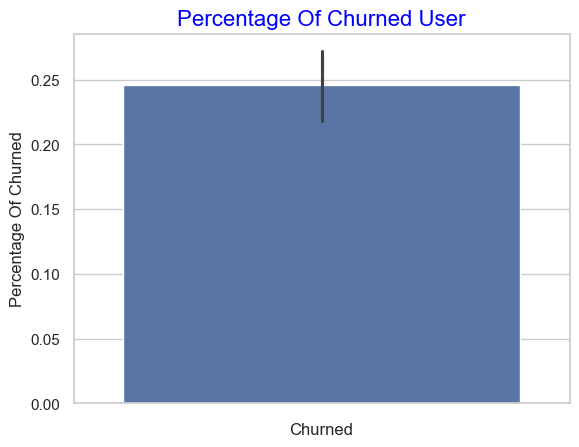

In [66]:
sns.barplot( y='Churned', data=df)
plt.title("Percentage Of Churned User", fontsize=16, color='blue')
plt.xlabel('Churned')
plt.ylabel('Percentage Of Churned')

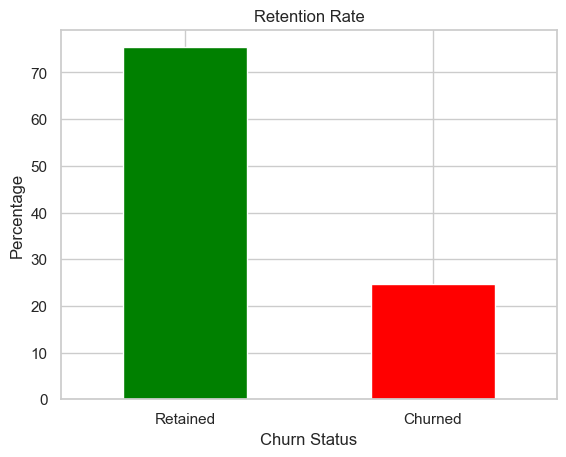

In [50]:
# calculate the retention rate and churned rate
retention_rate = df['Churned'].value_counts(normalize=True) * 100

# create the boxplot of the retention rate
fig, ax = plt.subplots()
retention_rate.plot(kind='bar', color=['green', 'red'], ax=ax)
ax.set_title('Retention Rate')
ax.set_xlabel('Churn Status')
ax.set_ylabel('Percentage')
ax.set_xticklabels(['Retained', 'Churned'], rotation=0)

plt.show()


Text(0.5, 1.0, 'Distribution Of Subscription_Type')

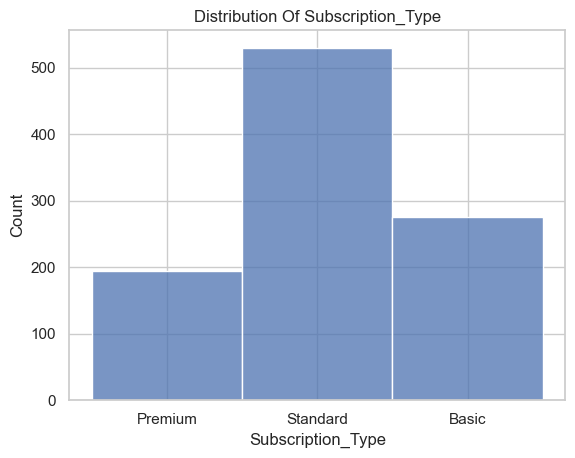

In [62]:
# Count the number of each Subscription_Type
sns.histplot(df['Subscription_Type'])
plt.title("Distribution Of Subscription_Type")


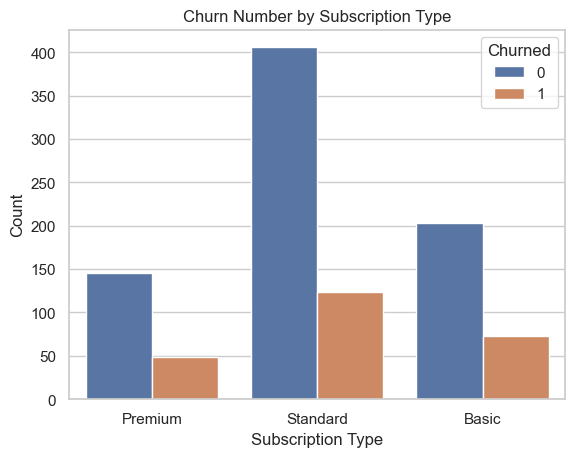

In [64]:
#Create the barplot for the churn user and retained user by Subscription Type
sns.countplot(x='Subscription_Type', hue='Churned', data=df)
plt.title('Churn Number by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

In [152]:
# calculate the total user and the retained user by each subscription type
subscription_retention = df.groupby('Subscription_Type').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

subscription_retention['retention_rate'] = (subscription_retention['retained_users'] / subscription_retention['total_users']) * 100

print(subscription_retention)

                   total_users  retained_users  retention_rate
Subscription_Type                                             
basic                      276             203       73.550725
premium                    194             145       74.742268
standard                   530             406       76.603774


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/3861775392.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscription_Type', y='retention_rate', data=subscription_retention, palette='deep')


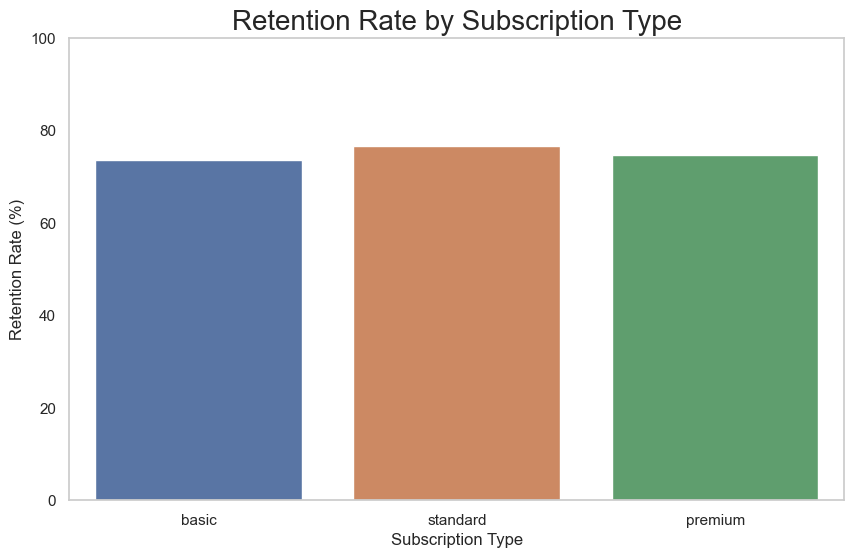

In [167]:
# create barplot for the percentage of the retained used by each subscription type with order of basic, standard, premium
subscription_order = ['basic', 'standard', 'premium']

subscription_retention['Subscription_Type'] = pd.Categorical(subscription_retention['Subscription_Type'], categories=subscription_order, ordered=True)
subscription_retention = subscription_retention.sort_values('Subscription_Type')

plt.figure(figsize=(10, 6))
sns.barplot(x='Subscription_Type', y='retention_rate', data=subscription_retention, palette='deep')
plt.title('Retention Rate by Subscription Type', fontsize=20)
plt.xlabel('Subscription Type')
plt.ylabel('Retention Rate (%)')
plt.ylim(0, 100) 
plt.grid(axis='y')
plt.show()


In [169]:
# calculate the total user and retained user by age with every 10 years
bins = [17, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39','40-49','50-59','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'Age_Group']].head(10))

age_retention = df.groupby('Age_Group').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

age_retention['retention_rate'] = (age_retention['retained_users'] / age_retention['total_users']) * 100

print(age_retention)

   Age Age_Group
0   56     50-59
1   69       60+
2   46     40-49
3   32     30-39
4   60     50-59
5   25     18-29
6   38     30-39
7   56     50-59
8   36     30-39
9   40     30-39
           total_users  retained_users  retention_rate
Age_Group                                             
18-29              235             171       72.765957
30-39              174             122       70.114943
40-49              214             171       79.906542
50-59              178             141       79.213483
60+                199             149       74.874372


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/679683537.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_retention = df.groupby('Age_Group').agg(


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/2217679567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_retention.index, y=age_retention['retention_rate'], palette='deep')


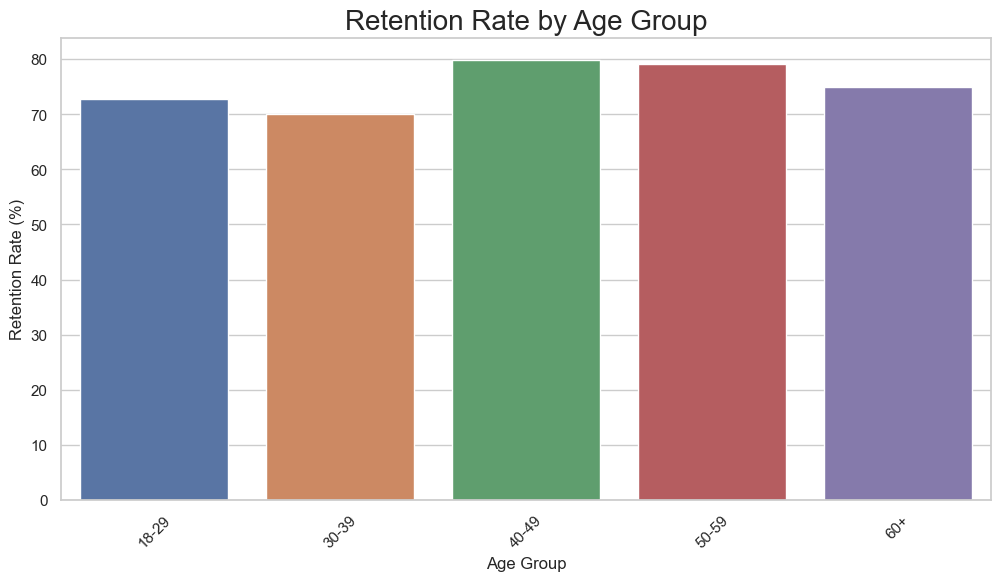

In [176]:
# create barplot for the retention rate by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=age_retention.index, y=age_retention['retention_rate'], palette='deep')
plt.title('Retention Rate by Age Group', fontsize = 20)
plt.xlabel('Age Group')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [174]:
# 计算每种设备的总用户数和未流失用户数
device_retention = df.groupby('Devices_Used').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

# 计算留存率
device_retention['retention_rate'] = (device_retention['retained_users'] / device_retention['total_users']) * 100

# 重置索引以便于查看
device_retention.reset_index(inplace=True)

# 查看结果
print(device_retention)


  Devices_Used  total_users  retained_users  retention_rate
0       Mobile          408             277       67.892157
1           PC          174             147       84.482759
2           TV          201             157       78.109453
3       Tablet          217             173       79.723502


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/958791395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Devices_Used', y='retention_rate', data=device_retention, palette='deep')


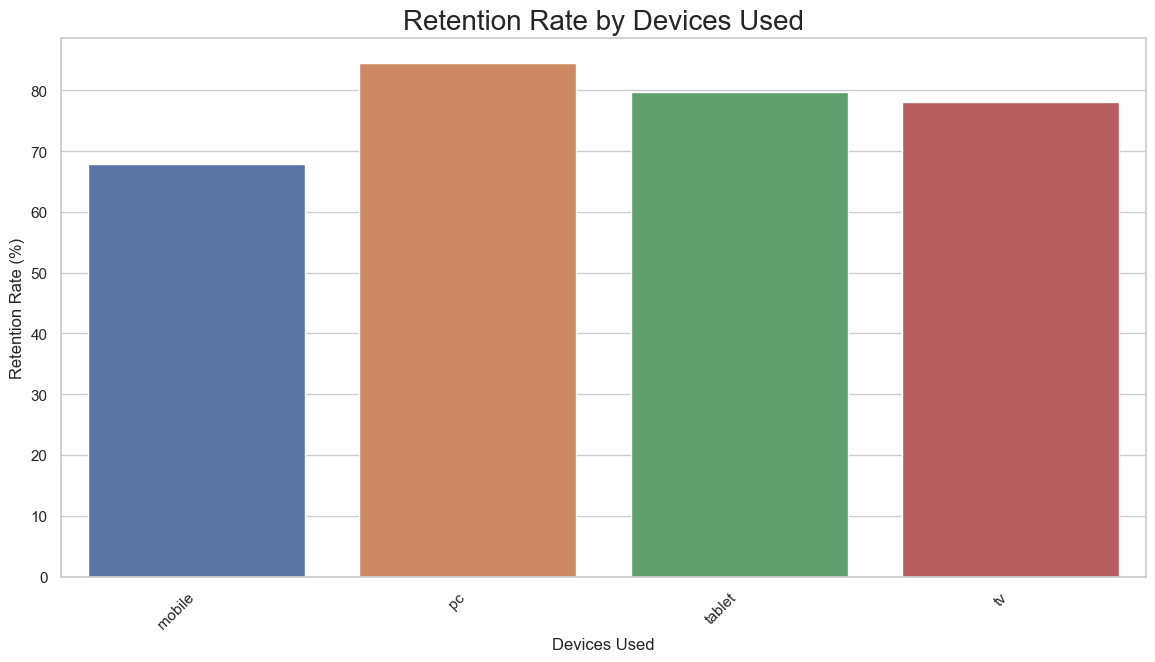

In [180]:
# 可视化留存率
plt.figure(figsize=(14, 7))
sns.barplot(x='Devices_Used', y='retention_rate', data=device_retention, palette='deep')
plt.title('Retention Rate by Devices Used', fontsize = 20)
plt.xlabel('Devices Used')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签以便于查看
plt.show()

Devices_Used
mobile    131
tablet     44
tv         44
pc         27
Name: count, dtype: int64


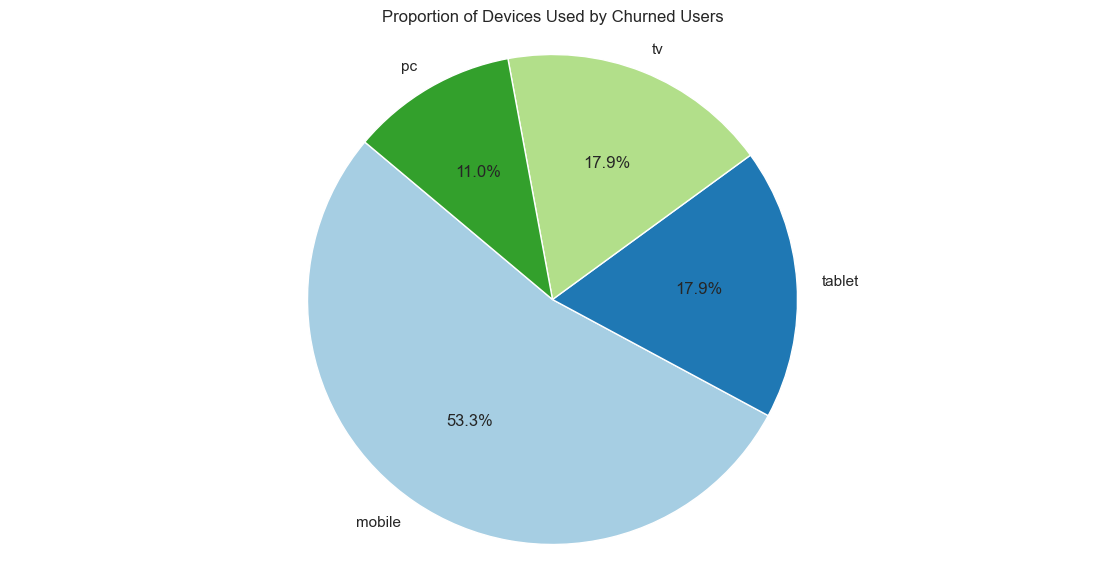

In [182]:
# 按设备统计退订用户数
device_churn_count = churned_users['Devices_Used'].value_counts()

# 打印结果以检查数据
print(device_churn_count)

# 绘制饼状图
plt.figure(figsize=(14, 7))
plt.pie(device_churn_count, labels=device_churn_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Devices Used by Churned Users')
plt.axis('equal')  # 保持饼状图为圆形
plt.show()
